In [1]:
import chess.pgn
import pandas as pd

from utils import stem_hist, get_games

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

### Get games

In [2]:
games = get_games('./data/lichess_db_standard_rated_2014-04.pgn', n=1000)

### Headers

In [3]:
hs = pd.DataFrame([dict(g.headers) for g in games])

for t in ['WhiteElo', 'BlackElo']:
    hs = hs[hs[t] != '?']
    hs[t] = hs[t].astype(int)

### Elo

WhiteElo: μ = 1599.49 | σ = 232.03
BlackElo: μ = 1588.55 | σ = 240.93


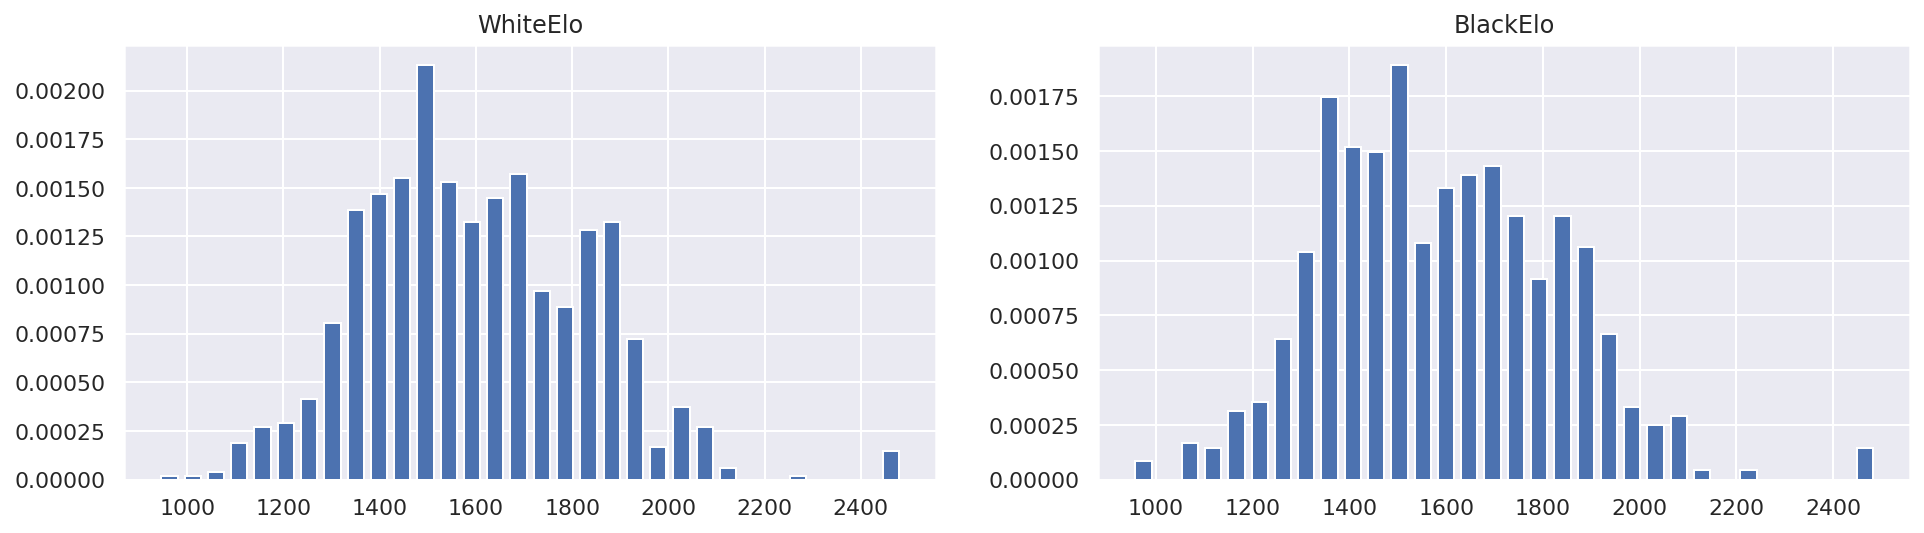

In [4]:
plt.figure(figsize=(16, 4))

for i, t in enumerate(['WhiteElo', 'BlackElo'], start=1):
    plt.subplot(1, 2, i)
    plt.title(t)
    hs[t].astype(int).hist(bins=32, rwidth=0.7, density=True)
    print(f'{t}: μ = {hs[t].astype(int).mean():4.2f} | σ = {hs[t].astype(int).std():4.2f}')

### First move

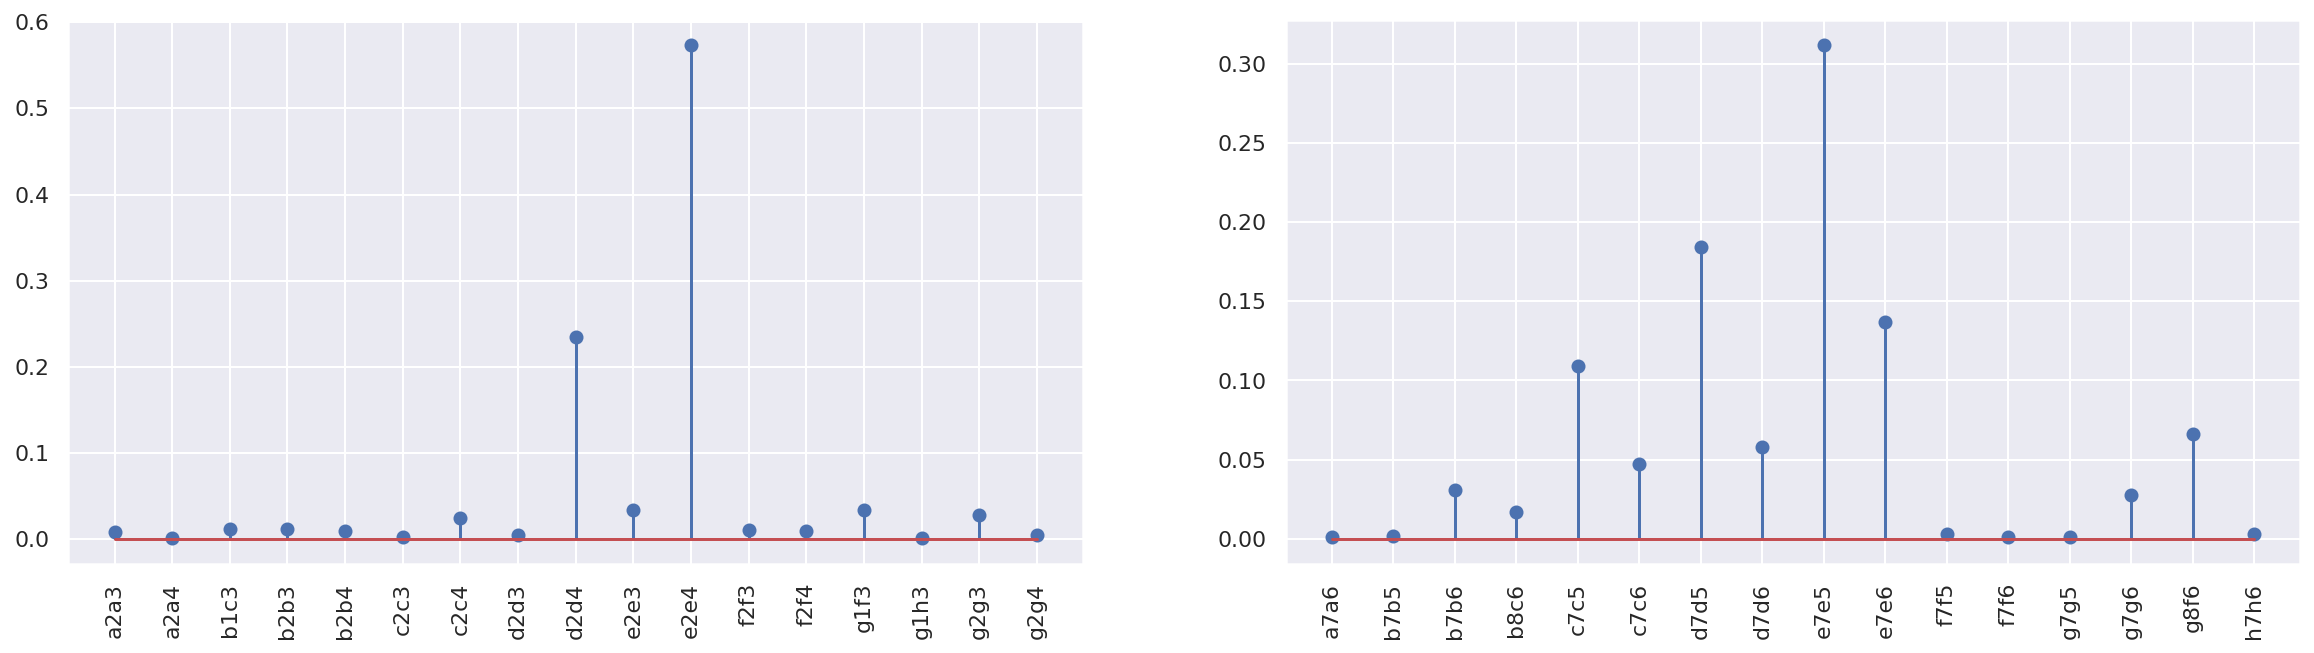

In [8]:
wf, bf = [], []

for g in games:
    m = list(g.mainline_moves())
    if len(m) < 2:
        continue
    wf += [m[0].uci()]
    bf += [m[1].uci()]

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
stem_hist(wf)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
stem_hist(bf)
plt.xticks(rotation=90)

pass

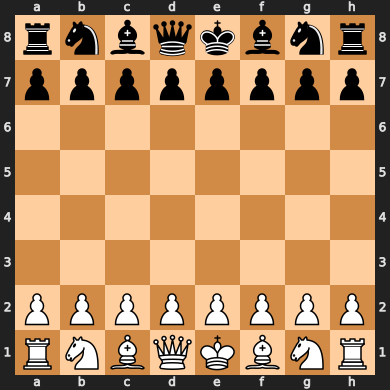

In [7]:
games[0].board()